# Day 65

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model

## Importing the dataset

In [2]:
(X_train, _),(X_test, _) = mnist.load_data()

In [3]:
X_train[0][5]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
         0,   0], dtype=uint8)

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
X_train[0][5]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01176471, 0.07058824, 0.07058824,
       0.07058824, 0.49411765, 0.53333333, 0.68627451, 0.10196078,
       0.65098039, 1.        , 0.96862745, 0.49803922, 0.        ,
       0.        , 0.        , 0.        ])

In [8]:
X_train = X_train.reshape(len(X_train), 28 * 28)
X_test = X_test.reshape(len(X_test), 28 * 28)

In [9]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


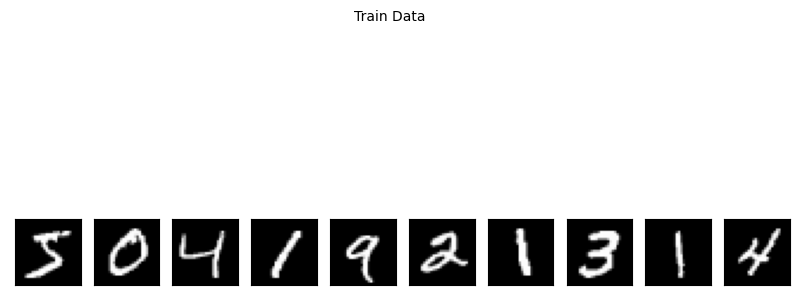

In [10]:
plt.figure(figsize=(10,5))
for i in range(10):
    ax = plt.subplot(1,10,i+1)
    plt.imshow(X_train[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.suptitle("Train Data", fontsize = 10)

In [11]:
def show_visual (data, title, n = 10,  height = 28, width = 28):
    plt.figure(figsize=(10,5))
    for i in range(n):
        ax = plt.subplot(1,n,i+1)
        plt.imshow(data[i].reshape(height, width))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title, fontsize = 15)    

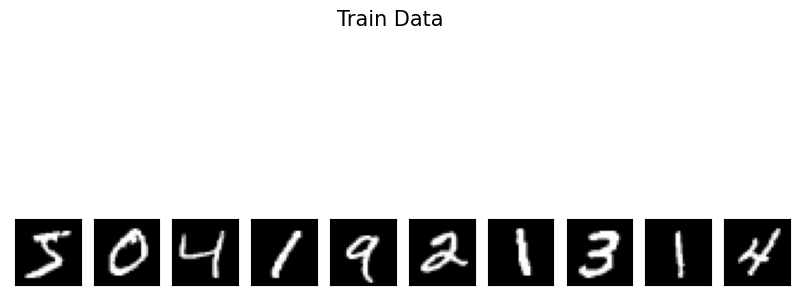

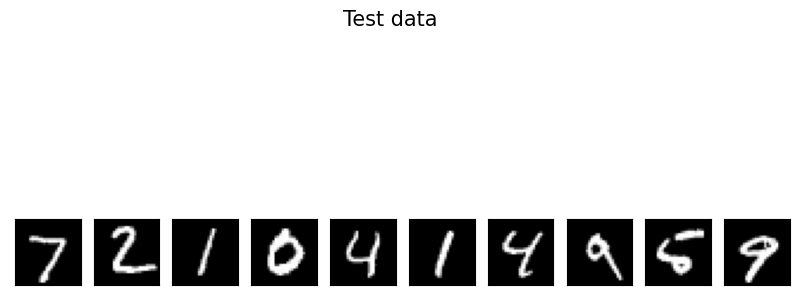

In [12]:
show_visual(X_train, title = "Train Data")
show_visual(X_test, title = "Test data")

In [13]:
input_dim, output_dim = 784, 784
encode_dim = 100
hidden_dim = 256

In [14]:
# Encoder
input_layer = Input(shape = input_dim, name = "INPUT")
hidden_layer_1 = Dense(hidden_dim, activation="relu", name = 'HIDDEN_1')(input_layer)

In [15]:
# Bottel Neck
bottel_neck = Dense(encode_dim, activation="relu", name = 'BOTTLE_NECK')(hidden_layer_1)

In [16]:
# Decoder
hidden_layer_2 = Dense(hidden_dim, activation="relu", name = 'HIDDEN_2')(bottel_neck)
output_layer = Dense(output_dim, activation='sigmoid', name = "OUTPUT")(hidden_layer_2)

In [17]:
model = Model(input_layer, output_layer)

In [18]:
model.compile(optimizer='adam', loss = 'binary_crossentropy')

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 INPUT (InputLayer)          [(None, 784)]             0         
                                                                 
 HIDDEN_1 (Dense)            (None, 256)               200960    
                                                                 
 BOTTLE_NECK (Dense)         (None, 100)               25700     
                                                                 
 HIDDEN_2 (Dense)            (None, 256)               25856     
                                                                 
 OUTPUT (Dense)              (None, 784)               201488    
                                                                 
Total params: 454,004
Trainable params: 454,004
Non-trainable params: 0
_________________________________________________________________


In [20]:
# as it is unsupervised learning and we don't have y_train so we will use same 
model.fit(X_train,X_train, epochs= 10)
# as epochs increases loss decreases

Epoch 1/10
1875/1875 [==============================] - 17s 8ms/step - loss: 0.1127
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0806
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0758
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0736
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0722
Epoch 6/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0713
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0705
Epoch 8/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0700
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0696
Epoch 10/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0692


In [21]:
decoded_data = model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [22]:
get_encoded_data = Model(inputs = model.input, 
                         outputs = model.get_layer("BOTTLE_NECK").output)

In [23]:
encoded_data = get_encoded_data.predict(X_test)

313/313 [==============================] - 1s 3ms/step


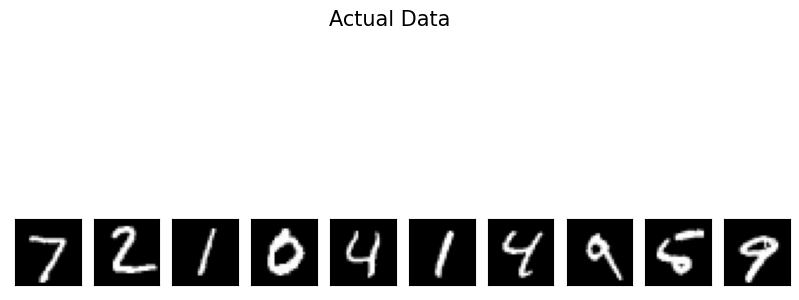

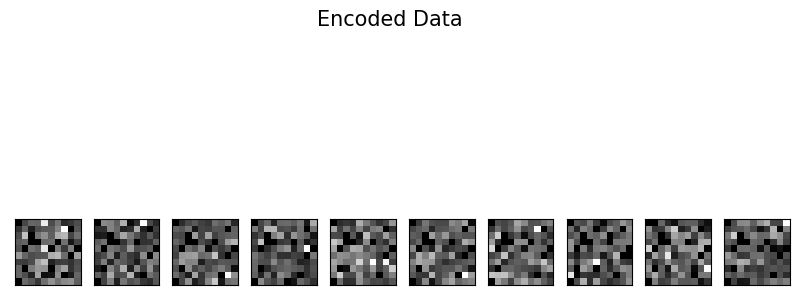

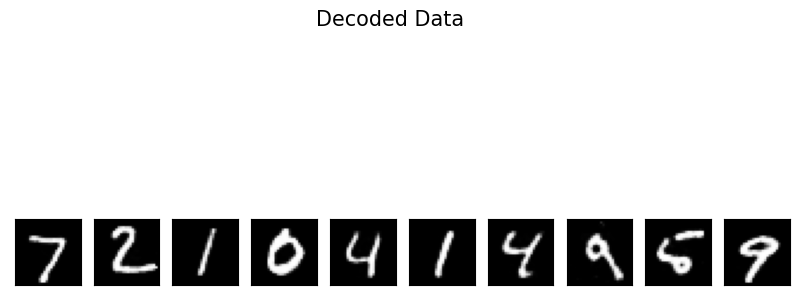

In [24]:
show_visual(X_test, title = 'Actual Data')
show_visual(encoded_data, title = 'Encoded Data', height = 10, width = 10)
show_visual(decoded_data, title = 'Decoded Data')